# Machine Learning in Python - Project 1

Due Friday, March 6th by 5 pm.

s1688223<br>
s1755455<br>
s1712377<br>
s1810770

## 0. Setup

In [1]:
# Install required packages
!pip install -q -r requirements.txt

You should consider upgrading via the '/Users/chris/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# Add any additional libraries or submodules below
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
# Load data
d = pd.read_csv("the_office.csv")

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

## Properties
log(total rating)   linear

episode_name not in account.


The dataset is not large enough. We would prefer the Cross-validation.

## 2. Exploratory Data Analysis and Feature Engineering

In [4]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import Lasso

## 1) Variable Approximation

In order to understand the underlying features of our data, we examine the relationships between our variables by using a pairplot as following:

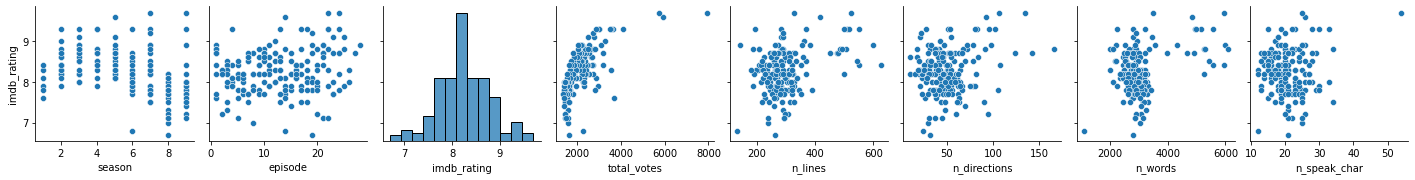

In [5]:
sns.pairplot(d,y_vars = "imdb_rating")

In this project, we focus on the second row of the this plot which is the relationship between the `imdb_rating` and other variables. By the first glance, we have the following observations:

* `season appear` to be categorical - Which makes sense as this TV series is divided by finitely many seasons.
* `total_votes` seem to have a potentially logarithmic relationship with `imdb_rating` .- Our main task here is to justify this hypothesis.
* Other variables, especially for `episode` and `n_speak_char` does not seem to have a strong relationships with `imdb_rating` , so we will discuss them later.



## Relationship analysis between `total_votes` and `imdb_rating`

Here we particularly focus on the relation between these two features: 'total_votes' and 'imdb_rating' as the the total votes seem to have obviously significant influence on the rating. To begin with, we can have a brief look at the sns pairplot above which gives the relation between imdb rating and each other features. While most plots have no obvious relation, total votes seems to have a log relation with imdb rating and we can start by focusing this feature.

## Linear Regression&Polynomial Regression Model

To find the relationships between `total_votes` and `imdb_rating`, we initially use the linear regression model(polynomial degree 1) and the polynomial regression models to fit the scatter plot:

In [6]:
# Total votes only
X = d.loc[:, d.columns != 'imdb_rating']
y = d['imdb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [7]:
# helper function for doing polynomial regression from lab
def poly_reg(data, x = 'x', y = 'y', degree=1, plot_data = True, plot_fit = True):
    X = np.c_[data[x]]
    Y = data[y]
    
    p = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression(fit_intercept=False)
    )
    
    m = p.fit(X,Y)
    
    pred_col = 'pred_d'+str(degree)
    data[pred_col] = m.predict(X)

    if plot_data:
        sns.scatterplot(x=data[x], y=data[y], color="black")

    if plot_fit:
        sns.lineplot(x=data[x], y=data[pred_col])
    
    return (data, m.steps[1][1])

def poly_reg_mse(data, x = 'x', y = 'y', degree=1, plot_data = True, plot_fit = True):
    X = np.c_[data[x]]
    Y = data[y]
    
    p = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression(fit_intercept=False)
    )
    
    m = p.fit(X,Y)
    
    pred_col = 'pred_d'+str(degree)
    data[pred_col] = m.predict(X)

    if plot_data:
        sns.scatterplot(data[x],data[y], color="black")

    if plot_fit:
        sns.lineplot(data[x],data[pred_col])
    
    # Only the line below needs to change
    return (data, m.steps[1][1], mean_squared_error(data[y], data[pred_col]))

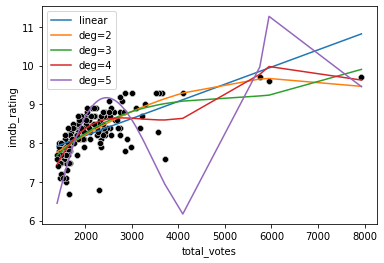

In [8]:
_, _ = poly_reg(d, x='total_votes',y='imdb_rating', degree=1)
_, _ = poly_reg(d, x='total_votes',y='imdb_rating', degree=2)
_, _ = poly_reg(d, x='total_votes',y='imdb_rating', degree=3)
_, _ = poly_reg(d, x='total_votes',y='imdb_rating', degree=4)
_, _ = poly_reg(d, x='total_votes',y='imdb_rating', degree=5)

plt.legend(['linear', 'deg=2','deg=3','deg=4','deg=5'])
plt.show()

Note that polynomial models of degree $6$ or higher produce very bad estimates, so we will not include them in our graph. Then, we compute the mean square error of these models to see how good our approximation is:

In [9]:
_, _, mse_d1 = poly_reg_mse(d, x='total_votes',y='imdb_rating',degree=1, plot_data=False, plot_fit=False)
_, _, mse_d2 = poly_reg_mse(d, x='total_votes',y='imdb_rating',degree=2, plot_data=False, plot_fit=False)
_, _, mse_d3 = poly_reg_mse(d, x='total_votes',y='imdb_rating',degree=3, plot_data=False, plot_fit=False)
_, _, mse_d4 = poly_reg_mse(d, x='total_votes',y='imdb_rating',degree=4, plot_data=False, plot_fit=False)
_, _, mse_d5 = poly_reg_mse(d, x='total_votes',y='imdb_rating',degree=5, plot_data=False, plot_fit=False)
print("deg=1:", mse_d1)
print("deg=2:", mse_d2)
print("deg=3:", mse_d3)
print("deg=4:", mse_d4)
print("deg=5:", mse_d5)

deg=1: 0.16303390078094304
deg=2: 0.14191722646201646
deg=3: 0.13686616486267703
deg=4: 0.1320370258117932
deg=5: 0.5374208340080494


We can see that degree $4$ has the lowest mean square error, however it may be overfitting the model. Degree $5$ or higher produce a very bad results which we should not consider. Our rule is to keep our model both accurate and simple,so we finally choose polynomial of degree $3$ as our approximation at this stage.

## Improvements on our approximation

Since `total_votes` is very left skewed, we may transfer it into log of `total_votes`. By doing this, we can get a symmetric and more 'normal' distribution. We now construct and add a new column `log_votes` which represents the logarithm of `total_votes`:

In [10]:
import math 
# compute the logorithm of total_votes

logofvote=[]
for i in d.total_votes:
    logofvote.append(math.log(i))
d['log_votes']=logofvote

Similarly as our previous approximation, we begin our analysis on the polynomial regression models:

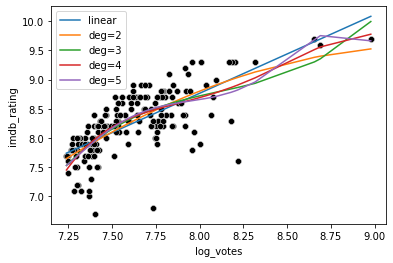

In [11]:
_, _ = poly_reg(d, x='log_votes',y='imdb_rating', degree=1)   # Attempt polynomial regression on different dimensions
_, _ = poly_reg(d, x='log_votes',y='imdb_rating', degree=2)
_, _ = poly_reg(d, x='log_votes',y='imdb_rating', degree=3)
_, _ = poly_reg(d, x='log_votes',y='imdb_rating', degree=4)
_, _ = poly_reg(d, x='log_votes',y='imdb_rating', degree=5)


plt.legend(['linear', 'deg=2','deg=3','deg=4','deg=5'])
plt.show()

In [12]:
_, _, mse_d1 = poly_reg_mse(d, x='log_votes',y='imdb_rating',degree=1, plot_data=False, plot_fit=False)
_, _, mse_d2 = poly_reg_mse(d, x='log_votes',y='imdb_rating',degree=2, plot_data=False, plot_fit=False)
_, _, mse_d3 = poly_reg_mse(d, x='log_votes',y='imdb_rating',degree=3, plot_data=False, plot_fit=False)
_, _, mse_d4 = poly_reg_mse(d, x='log_votes',y='imdb_rating',degree=4, plot_data=False, plot_fit=False)
_, _, mse_d5 = poly_reg_mse(d, x='log_votes',y='imdb_rating',degree=5, plot_data=False, plot_fit=False)
print("mse when deg=1:", mse_d1)
print("mse when deg=2:", mse_d2)
print("mse when deg=3:", mse_d3)
print("mse when deg=4:", mse_d4)
print("mse when deg=5:", mse_d5)

deg=1: 0.1384557511273586
deg=2: 0.1340572856666264
deg=3: 0.1295812376981505
deg=4: 0.12809124583794096
deg=5: 0.1267814750037907


According to the values of mean square error, our model has been improved a lot. In order to avoid any overfitting and underfitting, we choose polynomial model of degree $4$ as our model of best fit.

In [13]:
#Total votes only
d1 = d.drop(["episode_name","air_date","director","writer","main_chars","log_votes"],axis=1)
#log_votes only
d2 = d.drop(["episode_name","air_date","director","writer","main_chars","total_votes"],axis=1)

In [14]:
#Total votes only
X1 = d1.loc[:, d1.columns != 'imdb_rating']
y1 = d1['imdb_rating']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=1)

#log_votes only
X2 = d2.loc[:, d2.columns != 'imdb_rating']
y2 = d2['imdb_rating']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=1)

[ 2.55403038e+04  8.74083974e-02  1.34388341e-02  1.80890132e+00
  1.75290937e-03  6.23998965e-04 -4.85959866e-05 -1.71955402e-04
 -9.83098120e+03  7.19922845e+03 -1.11667313e+03  1.67218360e+02
  1.95928036e+01]


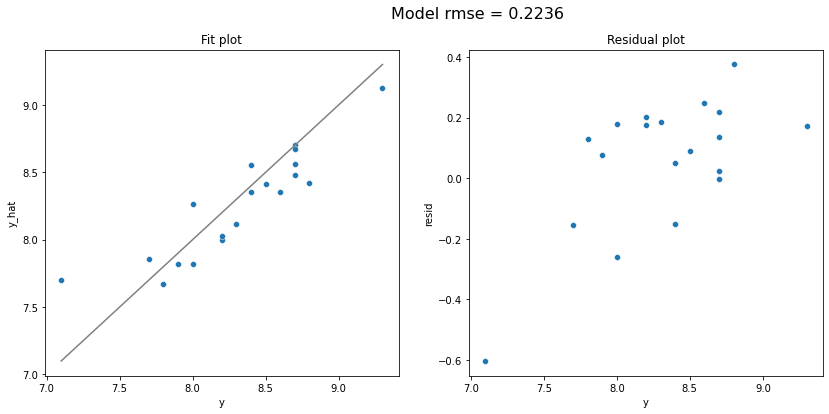

0.22360821758477495

In [18]:
lm = LinearRegression().fit(X1_train, y1_train)

def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

def model_fit(m, X, y, plot = False):
    """Returns the root mean squared error of a fitted model based on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    rmse = mean_squared_error(y, y_hat, squared=False)
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
        plt.show()
    
    return rmse

print(get_coefs(lm))
model_fit(lm, X1_test, y1_test, plot=True)

[-2.20968363e+00  8.92452956e-02  1.36481600e-02  1.77206940e-03
  6.70438445e-04 -5.62372590e-05 -1.25844701e-04 -1.22833455e+00
  2.50550513e+00  1.73840143e-01 -6.07665185e-01  1.14016280e+00
 -9.12845346e-01]


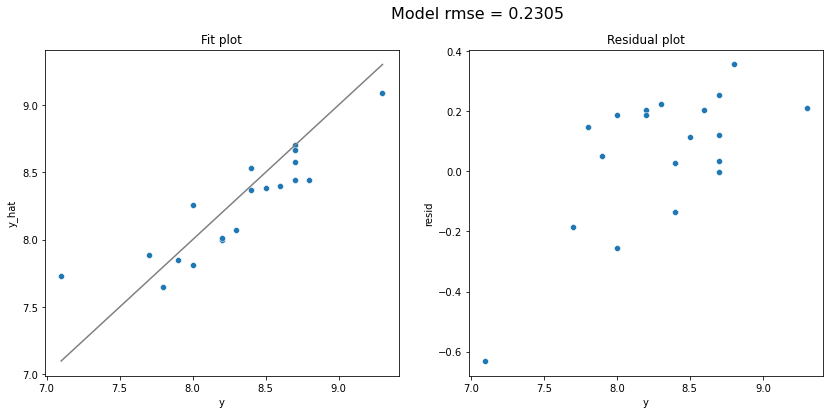

0.23051128357304118

In [19]:
lm = LinearRegression().fit(X2_train, y2_train)   # Fit a linear model and train using the splited X_train 
print(get_coefs(lm))
model_fit(lm, X2_test, y2_test, plot=True)

when using the 'total_votes' variable, the residual is increasing when y increas which is not we would like to see. 

When using 'log(total_votes)' the rmse decresed and we have a better residual plot. Therefore we would use 'log(total_votes)' 
instead of 'total_votes'.

## 2) Relationship analysis between `total_votes` and `Writer`

In [21]:
writer_data = d[['writer', 'imdb_rating']]  # Extract writer and imdb rating data
writers = writer_data['writer'].unique()
writers = [i.split(';') for i in writers]
flat_list = set(sum(writers, []))    # Get the unique list of different writers

new_writer_data = pd.DataFrame(np.zeros((186, 40)), columns= flat_list)   # Generate new dataframe 
row_index = 0
for writer in writer_data['writer']:   # Where the features are unique writers.
    w = writer.split(';')
    for name in w:
        new_writer_data.loc[row_index, name] = 1
    row_index += 1
    
X_writer = new_writer_data
y = d['imdb_rating']   # y is the imdb rating.
new_writer_data = new_writer_data.join(y)

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_writer_data.corr()
#Correlation with output variable
cor_target = abs(cor["imdb_rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Greg Daniels      0.233452
Owen Ellickson    0.222360
imdb_rating       1.000000
Name: imdb_rating, dtype: float64

<Figure size 864x720 with 0 Axes>

In [23]:
print(new_writer_data[["Owen Ellickson","Greg Daniels"]].corr())
print(new_writer_data[["Owen Ellickson","Greg Daniels"]].corr()) # It is seen that the two writers are 
                                # not highly correlated with each other. Hence we would keep both variables.

                Owen Ellickson  Greg Daniels
Owen Ellickson        1.000000     -0.038932
Greg Daniels         -0.038932      1.000000
                Owen Ellickson  Greg Daniels
Owen Ellickson        1.000000     -0.038932
Greg Daniels         -0.038932      1.000000


In [24]:
reg = LassoCV()
reg.fit(X_writer, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_writer,y))
coef = pd.Series(reg.coef_, index = X_writer.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.000053
Best score using built-in LassoCV: 0.423543
Lasso picked 39 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

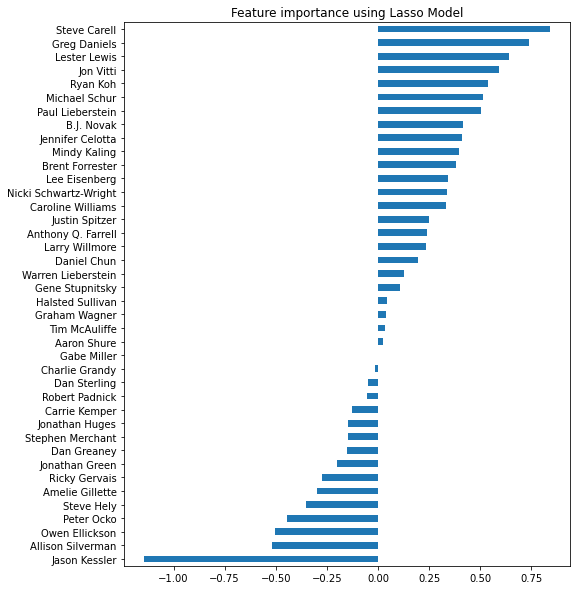

In [25]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [26]:
# We can use the same method above for the feature main character
char_data = d[['main_chars', 'imdb_rating']]  # Extract main character and imdb rating data
characters = char_data['main_chars'].unique()
characters = [i.split(';') for i in characters]
flat_chars = set(sum(characters, []))    # Get the unique list of different characters

new_characters_data = pd.DataFrame(np.zeros((186, 17)), columns= flat_chars)   # Generate new dataframe 
row_index = 0
for char in char_data['main_chars']:   # Where the features are unique characters.
    w = char.split(';')
    for name in w:
        new_characters_data.loc[row_index, name] = 1
    row_index += 1
    
X_character = new_characters_data
new_characters_data = new_characters_data.join(y)

In [27]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_characters_data.corr()
#Correlation with output variable
cor_target = abs(cor["imdb_rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Erin           0.370276
Michael        0.497974
imdb_rating    1.000000
Name: imdb_rating, dtype: float64

<Figure size 864x720 with 0 Axes>

In [28]:
print(new_characters_data[["Michael","Erin"]].corr())
print(new_characters_data[["Michael","Erin"]].corr())
# It seems that these two characters have pretty high correlation thus we only need to keep one of them.

          Michael      Erin
Michael  1.000000 -0.566717
Erin    -0.566717  1.000000
          Michael      Erin
Michael  1.000000 -0.566717
Erin    -0.566717  1.000000


Best alpha using built-in LassoCV: 0.006700
Best score using built-in LassoCV: 0.311061
Lasso picked 11 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

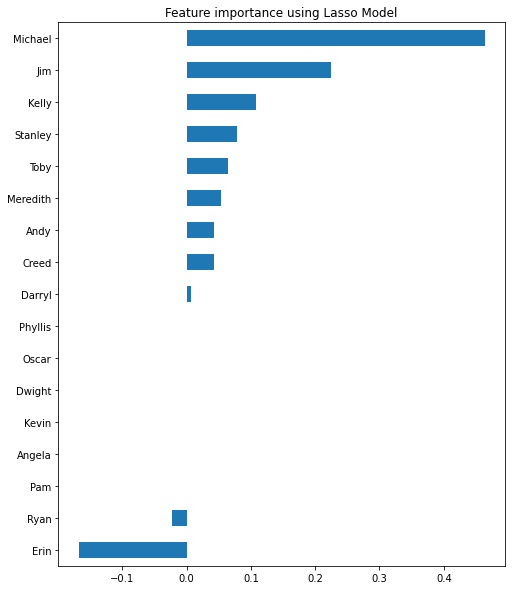

In [29]:
reg = LassoCV()
reg.fit(X_character, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_character,y))
coef = pd.Series(reg.coef_, index = X_character.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [30]:
# As for directors
directors_data = d[['director', 'imdb_rating']]  # Extract directors and imdb rating data
directors = directors_data['director'].unique()
directors = [i.split(';') for i in directors]
flat_directors = set(sum(directors, []))    # Get the unique list of different directors

new_directors_data = pd.DataFrame(np.zeros((186, 60)), columns= flat_directors)   # Generate new dataframe 
row_index = 0
for director in directors_data['director']:   # Where the features are unique directors.
    w = director.split(';')
    for name in w:
        new_directors_data.loc[row_index, name] = 1
    row_index += 1
    
X_directors = new_directors_data
new_directors_data = new_directors_data.join(y)

In [31]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_directors_data.corr()
#Correlation with output variable
cor_target = abs(cor["imdb_rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Paul Feig      0.232619
imdb_rating    1.000000
Name: imdb_rating, dtype: float64

<Figure size 864x720 with 0 Axes>

Best alpha using built-in LassoCV: 0.010003
Best score using built-in LassoCV: 0.111508
Lasso picked 6 variables and eliminated the other 54 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

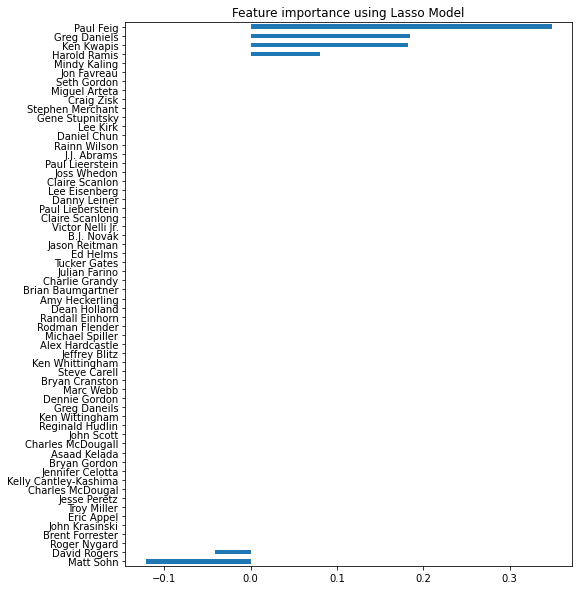

In [32]:
reg = LassoCV()
reg.fit(X_directors, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_directors,y))
coef = pd.Series(reg.coef_, index = X_directors.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In conclusion, We pick 4 writers including Greg Daniels, Owen Ellickson, Steve Carell and Jason Kessier.
Steve Carell and Jason Kessler for writers, micheal and Erin for main characters.
and paul Feig for directors to be the important features in predict the imdb rating. 

The selection mainly based on the Correlation Coefficient between each features and the lassoCV.

In [34]:
#Total votes only
X = d1.loc[:, d1.columns != 'imdb_rating']
y = d1['imdb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

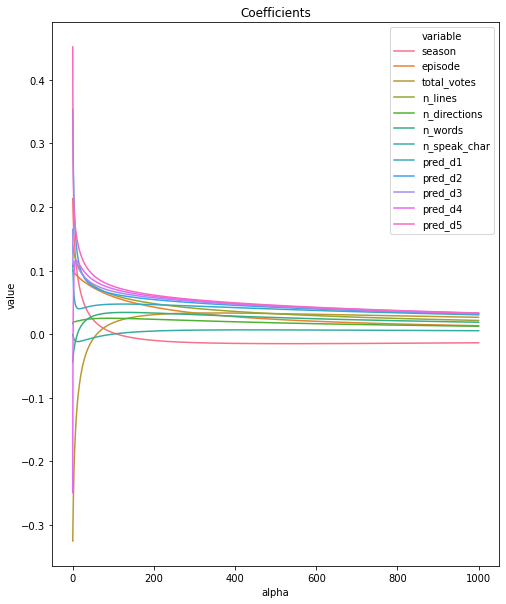

In [35]:
#total_votes
alphas = np.logspace(-2, 3, num=200) # from 10^-2 to 10^3

betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Ridge(alpha=a)
    ).fit(X_train, y_train)
    
    # We drop the intercept as it is not included in Ridge's l2 penalty and hence not shrunk
    betas.append(get_coefs(m)[1:]) 
    rmses.append(model_fit(m, X1_test, y1_test))



res = pd.DataFrame(
    data = betas,
    columns = X1.columns # Label columns w/ feature names
).assign(
    alpha = alphas,
    rmse = rmses
).melt(
    id_vars = ('alpha', 'rmse')
)

sns.lineplot(x='alpha', y='value', hue='variable', data=res).set_title("Coefficients")
plt.show()

From the graph above, we can see that the varible 'n_words' and 'n_speak_char' have little influence of our model.

In [37]:
# Here we define d1 as our new training data framework.

# Reload data
d1 = pd.read_csv("the_office.csv")
d1["writer_Steve"]=( d1.writer.str.contains("Steve Carell")).astype(int) # Returns either 0 or 1
d1["writer_Greg"]=( d1.writer.str.contains("Greg Daniels")).astype(int) # Returns either 0 or 1
d1["writer_Owen"]=( d1.writer.str.contains("Owen Ellickson")).astype(int) # Returns either 0 or 1
d1["writer_Greg"]=( d1.writer.str.contains("Jason Kessler")).astype(int) # Returns either 0 or 1

d1["chars_Erin"]=( d1.main_chars.str.contains("Erin")).astype(int) # Returns either 0 or 1
d1["chars_Michael"]=( d1.main_chars.str.contains("Michael")).astype(int) # Returns either 0 or 1

d1["director_Matt"]=( d1.director.str.contains("Matt Sohn")).astype(int) # Returns either 0 or 1
d1["director_Paul"]=( d1.director.str.contains("Paul Feig")).astype(int) # Returns either 0 or 1

# compute the logorithm of total_votes
logofvote=[]
for i in d.total_votes:
    logofvote.append(math.log(i))
d1['log_votes']=logofvote
d1=d1.drop(["episode_name","air_date","director","writer","main_chars","n_words","n_speak_char"],axis=1)

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

Model training

In [39]:
#Here is our new featured data we obtained in the last section.
d1

,season,episode,imdb_rating,total_votes,n_lines,n_directions,writer_Steve,writer_Greg,writer_Owen,chars_Erin,chars_Michael,director_Matt,director_Paul,log_votes
0,1,1,7.6,3706,229,27,0,0,0,0,1,0,0,8.217708
1,1,2,8.3,3566,203,20,0,0,0,0,1,0,0,8.179200
2,1,3,7.9,2983,244,21,0,0,0,0,1,0,0,8.000685
3,1,4,8.1,2886,243,24,0,0,0,0,1,0,0,7.967627
4,1,5,8.4,3179,230,49,0,0,0,0,1,0,0,8.064322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,8.0,1484,273,59,0,0,0,1,0,1,0,7.302496
182,9,20,8.0,1482,234,48,0,0,0,1,0,0,0,7.301148
183,9,21,8.9,2041,382,33,0,0,0,1,0,0,0,7.621195
184,9,22,9.3,2860,501,54,0,0,0,1,0,0,0,7.958577


## 3) Base line model:

In [40]:
#log_votes only
X = d1.loc[:, d1.columns != 'imdb_rating']
y = d1['imdb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

[-2.58936717e+01  1.90477365e-01  1.53329335e-02 -1.02550551e-03
  5.62255475e-04  6.84759676e-04  1.14900332e-01 -2.05532499e+00
 -1.22022849e-01 -1.77199055e-01  4.08476958e-01  5.38067769e-02
 -3.67576743e-02  4.55547544e+00]


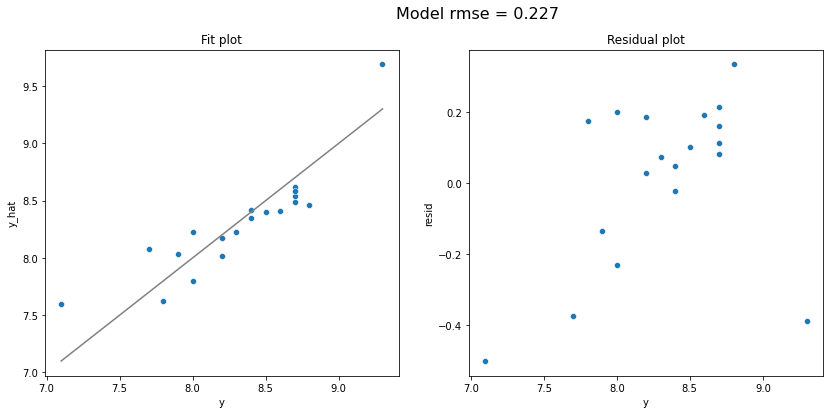

0.22702793611843258

In [41]:
lm = LinearRegression().fit(X_train, y_train)
print(get_coefs(lm))
model_fit(lm, X_test, y_test, plot=True)

## Ridge Regression

In [42]:
def poly_reg_mse(data, x = 'x', y = 'y', degree=1, plot_data = True, plot_fit = True):
    X = np.c_[data[x]]
    Y = data[y]
    
    p = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression(fit_intercept=False)
    )
    
    m = p.fit(X,Y)
    
    pred_col = 'pred_d'+str(degree)
    data[pred_col] = m.predict(X)

    if plot_data:
        sns.scatterplot(data[x],data[y], color="black")

    if plot_fit:
        sns.lineplot(data[x],data[pred_col])

    
    MSE = mean_squared_error(
        y_true = data.y,
        y_pred = data[pred_col]
    )
    return (data, m.steps[1][1],MSE)

def reg_tree_mse(data, x = 'x', y = 'y', 
             n_bins=10, strategy = "uniform",
             x_range = np.array([0,1]),
             plot_data = True, plot_fit = True):
    
    X = np.c_[data[x]]
    Y = data[y]
    
    p = make_pipeline(
        KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode="onehot-dense"),
        LinearRegression(fit_intercept=False) # Since we are using onehot above we 
    )                                         # need to remove the intercept here
    
    m = p.fit(X,Y)
    
    pred_col = 'pred_rt_M'+str(n_bins)
    data[pred_col] = m.predict(X)

    if plot_data:
        sns.scatterplot(x=data[x], y=data[y], color="black")

    if plot_fit:
        sns.lineplot(x=data[x], y=data[pred_col])
    
    MSE = mean_squared_error(
        y_true = data.y,
        y_pred = data[pred_col]
    )
    return (data, m,MSE)

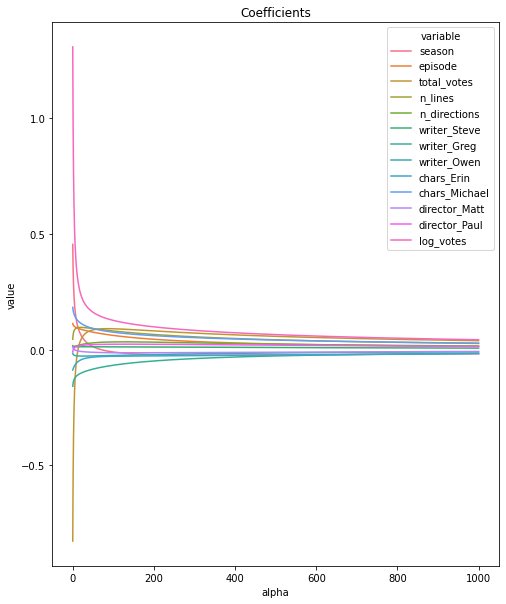

In [43]:
alphas = np.logspace(-2, 3, num=200) # from 10^-2 to 10^3

betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Ridge(alpha=a)
    ).fit(X_train, y_train)
    
    # We drop the intercept as it is not included in Ridge's l2 penalty and hence not shrunk
    betas.append(get_coefs(m)[1:]) 
    rmses.append(model_fit(m, X_test, y_test))

    
res = pd.DataFrame(
    data = betas,
    columns = X.columns # Label columns w/ feature names
).assign(
    alpha = alphas,
    rmse = rmses
).melt(
    id_vars = ('alpha', 'rmse')
)

sns.lineplot(x='alpha', y='value', hue='variable', data=res).set_title("Coefficients")
plt.show()

In [44]:
# Note that we are passing `sklearn.model_selection.KFold(5, shuffle=True, random_state=1234)` 
# to the `cv` argument rather than leaving it to its default. This is because, while not obvious, 
# the prostate data is structured (sorted by `lpsa` value) and this way we are able to ensure 
# that the folds are properly shuffled. Failing to do this causes *very* unreliable results from 
# the cross validation process.

# Once fit, we can examine the results to determine what value of $\alpha$ was chosen as well as examine the
# calculated mean of the rmses.
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Ridge()
    ),
    param_grid={'ridge__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1),
    scoring="neg_root_mean_squared_error"
).fit(X_train, y_train)

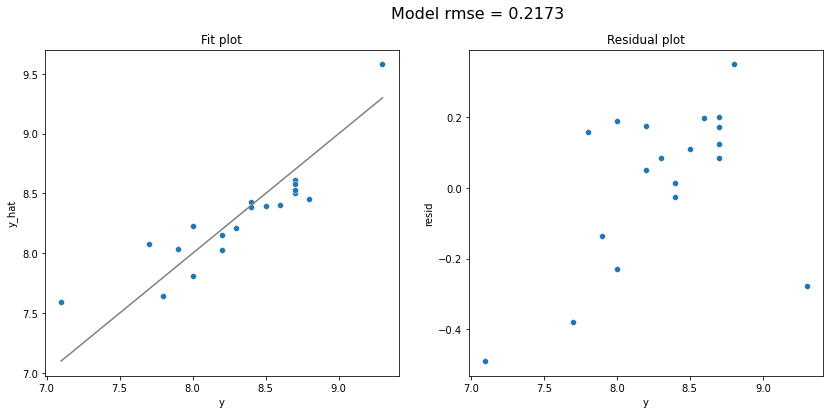

{'ridge__alpha': 0.3036771118035459}


In [45]:
model_fit(gs.best_estimator_, X_test, y_test, plot=True)
print(gs.best_params_)

In [46]:
# we can see that the rmse decreased

In [47]:
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Ridge()
    ),
    param_grid={'ridge__alpha': alphas},
    cv=KFold(10, shuffle=True, random_state=1),
    scoring="neg_root_mean_squared_error"
).fit(X_train, y_train)


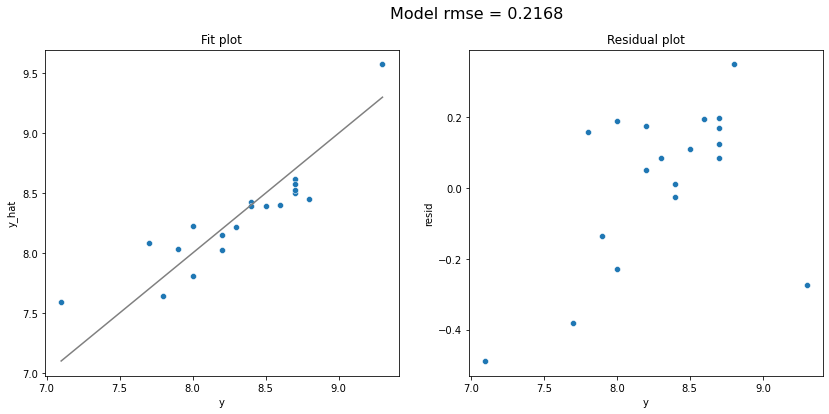

{'ridge__alpha': 0.3217641750250737}


In [48]:
temp=model_fit(gs.best_estimator_, X_test, y_test, plot=True)
print(gs.best_params_)

In [49]:
# 10 folds better?

<AxesSubplot:xlabel='alpha', ylabel='mean_test_score'>

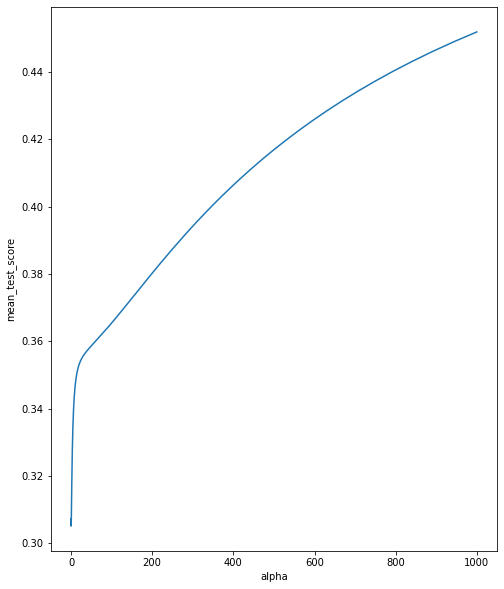

In [50]:
cv_res = pd.DataFrame(
    data = gs.cv_results_
).filter(
    # Extract the split#_test_score and mean_test_score columns
    regex = '(split[0-9]+|mean)_test_score'
).assign(
    # Add the alphas as a column
    alpha = alphas
)

cv_res.update(
    # Convert negative rmses to positive
    -1 * cv_res.filter(regex = '_test_score')
)

sns.lineplot(x='alpha', y='mean_test_score', data=cv_res)


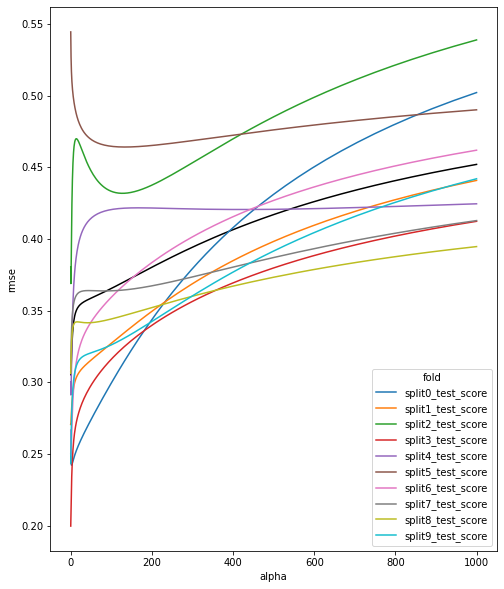

In [51]:
d = cv_res.melt(
    id_vars=('alpha','mean_test_score'),
    var_name='fold',
    value_name='rmse'
)

sns.lineplot(x='alpha', y='rmse', color='black', ci = None, data = d)  # Plot the mean rmse +/- the std dev of the rmse.
sns.lineplot(x='alpha', y='rmse', hue='fold', data = d) # Plot the curves for each fold
plt.show()

## Lasso Regression

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a NBC Universal executive who is with the show and  university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Finally, you should include concrete recommendations on what NBC Universal should do to make their reunion episode a popular as possible.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

In [ ]:
# Threrfore we use Rige regression with best alpha=0.321

## 5. Convert Document

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to markdown project1.ipynb